#### Description

This code evaluates the MSE of GA_1_0, GA_1_1, GA_1_2, and GA_1_3's GA algorithms to see if subpopulations and/or adaptive mutation rate increase the accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import GA_1_0
import GA_1_1
import GA_1_2
import GA_1_3

In [3]:
run_per_expression = 10
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN' # 75 Ns
target_expressions = [i for i in np.arange(0, 1.2, 0.1)]

In [4]:
# Paths and parameters
path_to_cnn = '../Models/CNN_6_1_2.keras'

# Genetic algorithm parameters
max_length = 150
pop_size = 100
generations = 100
base_mutation_rate = 0.1
precision = 0.001
num_islands = 4
migration_interval = 10
num_migrants = 2

# Initialize CNN and device
device = GA_1_0.get_device()
cnn = GA_1_0.load_model(path_to_cnn)

c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
# GA_1_0: Single population, no adaptive mutation rate

GA_1_0_errors = {target : 0 for target in target_expressions}

for target_expression in target_expressions:
    for _ in range(run_per_expression):
        best_sequence, best_prediction = GA_1_0.genetic_algorithm(
            cnn, masked_sequence, target_expression, pop_size=pop_size, generations=generations, base_mutation_rate=base_mutation_rate, precision=precision, print_progress=False
        )
        GA_1_0_errors[target_expression] += (target_expression - best_prediction) ** 2
    GA_1_0_errors[target_expression] /= run_per_expression

Instructions for updating:
Use tf.identity with explicit device placement instead.


In [6]:
# GA_1_1: Multiple populations, no adaptive mutation rate

GA_1_1_errors = {target : 0 for target in target_expressions}

for target_expression in target_expressions:
    for _ in range(run_per_expression):
        best_sequence, best_prediction = GA_1_1.genetic_algorithm(
            cnn, masked_sequence, target_expression, pop_size=pop_size, generations=generations, base_mutation_rate=base_mutation_rate,
            precision=precision, num_islands=num_islands, migration_interval=migration_interval, num_migrants=num_migrants, print_progress=False
        )
        GA_1_1_errors[target_expression] += (target_expression - best_prediction) ** 2
    GA_1_1_errors[target_expression] /= run_per_expression

In [7]:
# GA_1_2: Single population with adaptive mutation rate

GA_1_2_errors = {target : 0 for target in target_expressions}

for target_expression in target_expressions:
    for _ in range(run_per_expression):
        best_sequence, best_prediction = GA_1_2.genetic_algorithm(
            cnn, masked_sequence, target_expression, pop_size=pop_size, generations=generations, base_mutation_rate=base_mutation_rate, precision=precision, print_progress=False
        )
        GA_1_2_errors[target_expression] += (target_expression - best_prediction) ** 2
    GA_1_2_errors[target_expression] /= run_per_expression

In [8]:
# GA_1_3: Multiple populations with adaptive mutation rate

GA_1_3_errors = {target : 0 for target in target_expressions}

for target_expression in target_expressions:
    for _ in range(run_per_expression):
        best_sequence, best_prediction = GA_1_3.genetic_algorithm(
            cnn, masked_sequence, target_expression, pop_size=pop_size, generations=generations, base_mutation_rate=base_mutation_rate,
            precision=precision, num_islands=num_islands, migration_interval=migration_interval, num_migrants=num_migrants, print_progress=False
        )
        GA_1_3_errors[target_expression] += (target_expression - best_prediction) ** 2
    GA_1_3_errors[target_expression] /= run_per_expression

In [9]:
# Convert to DataFrame

data = [GA_1_0_errors, GA_1_1_errors, GA_1_2_errors, GA_1_3_errors]
df = pd.DataFrame(data)
df.index  = ['GA_1_0', 'GA_1_1', 'GA_1_2', 'GA_1_3']
df_t = df.T

df.head()

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1
GA_1_0,0.012878,0.000227,3.465321e-07,3.068294e-07,1.730474e-07,4.136206e-07,2.239814e-07,3.916289e-07,6.206393e-07,0.000907,0.012447,0.048836
GA_1_1,0.013105,0.000136,2.773804e-07,2.764488e-07,2.846776e-07,2.833537e-07,2.615022e-07,1.810875e-07,2.384486e-07,0.000683,0.016476,0.042843
GA_1_2,0.014480,0.000307,1.339748e-07,1.804137e-07,1.724470e-07,3.388848e-07,1.944846e-07,3.233605e-07,3.600813e-07,0.001673,0.014891,0.051484
GA_1_3,0.012451,0.000169,3.220341e-07,4.867981e-07,2.540341e-07,2.624571e-07,2.470508e-07,3.033336e-07,6.061601e-07,0.001069,0.007957,0.034783


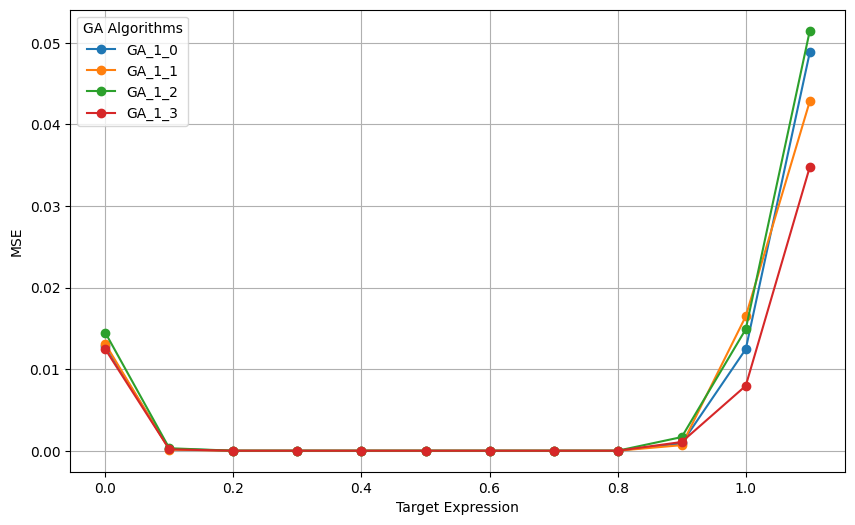

In [10]:
# Plot the results

plt.figure(figsize=(10, 6))
for row in df_t.columns:
    plt.plot(df_t.index, df_t[row], marker='o', label=row)

plt.xlabel('Target Expression')
plt.ylabel('MSE')
plt.legend(title="GA Algorithms")
plt.grid(True)
plt.show()

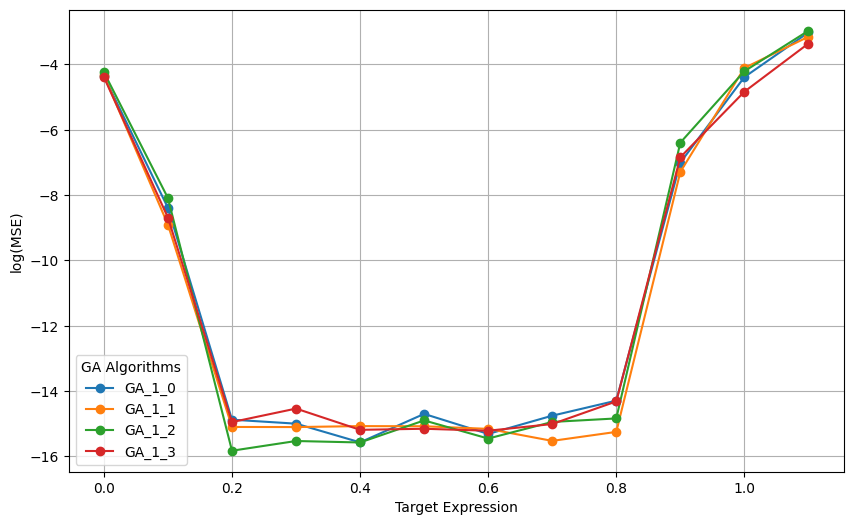

In [11]:
# Plot the results

plt.figure(figsize=(10, 6))
for row in df_t.columns:
    plt.plot(df_t.index, np.log(df_t[row]), marker='o', label=row)

plt.xlabel('Target Expression')
plt.ylabel('log(MSE)')
plt.legend(title="GA Algorithms")
plt.grid(True)
plt.show()

In [12]:
# Calculate the average MSE for each algorithm

average_mse = df.mean(axis=1)
average_mse

GA_1_0    0.006275
GA_1_1    0.006104
GA_1_2    0.006903
GA_1_3    0.004703
dtype: float64